In [ ]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import unicodedata
import math
from apps import *
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [ ]:
def autenticar(n_app):

    n_app = n_app % 259
    app = apps[n_app]
    consumer_key = app['consumer_key']
    consumer_secret = app['consumer_secret']
    access_token = app['access_token']
    access_token_secret = app['access_token_secret']
    

    auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)

    auth.set_access_token(access_token, access_token_secret)

    # Creation of the actual interface, using authentication
    api = tweepy.API(auth)

    #Error handling
    if (not api):
        print ("Problem Connecting to API")
    else:
        print "Autenticado " + str(n_app)

    #print api.rate_limit_status()
    return api


def autenticar_app(n_app):

    n_app = n_app % 255
    app = apps[n_app]
    consumer_key = app['consumer_key']
    consumer_secret = app['consumer_secret']
    access_token = app['access_token']
    access_token_secret = app['access_token_secret']

    #Switching to application authentication
    auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

    #Setting up new api wrapper, using authentication only
    api = tweepy.API(auth) #wait_on_rate_limit=True
     
    #Error handling
    if (not api):
        print ("Problem Connecting to API")
    else:
        print "Autenticado App" + str(n_app)
    return api

def buscar_tweets(prov,api,n_app,printi,cant_tweets):
    
    tweet_count = 0
    cant_tweets = cant_tweets
    coords = provincias[prov]['coords']
    
    f_tweets = open(prov+'_tweets.json','a')
    f_users = open(prov+'_users.json','a')
    usr_prov = 0
    cant_por_coord = 40000
    
    while (usr_prov < cant_tweets):
        for coord in coords:
            if usr_prov >= cant_tweets:
                #print 'break2'
                break

            ic = 0
            #print str(coords.index(coord)) +  '/' + str(len(coords))
            prev = 0
            
            #print 'coord, tweet' ,coord, tweet_count
            #print "Intento " + str(tweet_count)
            act = 0 
            try:
                for tweet in tweepy.Cursor(api.search, count=100,lang="es",geocode=(coord + ',20mi')).items():
                    #print(tweet.id)
                    tweet_count += 1
                    ic += 1
                    if tweet_count % printi == 0:
                        print '\t' , tweet_count, ic, usr_prov, prev
                        if prev and usr_prov - prev < 2:
                            break
                        prev = usr_prov

                    

                    if tweet.user.location!="":  
                        location=unicodedata.normalize('NFKD',tweet.user.location).encode('ASCII', 'ignore').lower().replace('-',' ').replace(';',' ').replace(',',' ').replace('|',' ').replace('?',' ').replace('¿',' ').replace("\ ",' ').replace('/',' ')
                        location = word_tokenize(location)
                        #print location
                        words = provincias[prov]['words']
                        matches=[x for x in location if x in words]
                        if len(matches)>0 and tweet.user.id not in ids:
                            usr_prov += 1
                            
                            f_users.write(json.dumps(tweet._json['user']))
                            f_users.write("\n")
                            f_tweets.write(json.dumps(tweet._json))
                            f_tweets.write("\n")
                            ids[tweet.user.id] = 1
                            location = tweet.user.location
                            loc[location] = 1 if not loc.has_key(location) else loc[location] +1
                            if usr_prov >= cant_tweets:
                                #print 'break2'
                                break
                            
                    if ic >= cant_por_coord:
                        #print 'break1'
                        break
                            
            except tweepy.TweepError,e:
                n_app += 1
                #print "Error " + str(e)
                api = autenticar_app(n_app)
                continue
            except Exception, e:
                #print "Error " + str(e)
                continue

    f_tweets.close()
    f_users.close()
    return n_app



In [ ]:

import json
i = 0
file_path = 'ult_json/jujuy_users.json'
with open(file_path) as f:
    for line in f:
        content = json.loads(line)
        print i,content['id_str']
        i += 1

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

i = 0
ids = {}
file_path = 'tweetsFinal/impares/buenosaires_tweets.json'
with open(file_path) as f:
    for line in f:
        tweet = json.loads(line)
        tid = tweet['user']['id']
        if tid not in ids:
            #print i,tid
            i += 1
            ids[tid] = {}
            ids[tid]['screen_name'] = tweet['user']['screen_name']
            ids[tid]['cant_tweets'] = 1
            ids[tid]['friends'] = tweet['user']['friends_count']
            ids[tid]['followers'] = tweet['user']['followers_count']
            ids[tid]['statuses_count'] = tweet['user']['statuses_count']
            ids[tid]['favorites'] = tweet['user']['favourites_count']
            ids[tid]['geo_enabled'] = tweet['user']['geo_enabled']
            ids[tid]['created_at'] = tweet['user']['created_at']
            ids[tid]['location'] = tweet['user']['location']
        else:
            ids[tid]['cant_tweets'] +=1
print len(ids)

458


Wed Sep 11 18:10:29 +0000 2013
Fri Apr 01 18:33:40 +0000 2016
            statuses_count    screen_name                      created_at  \
632434812             4763  NiquinhoLevin  Tue Jul 10 22:06:50 +0000 2012   
830176009            40164       RooCasal  Tue Sep 18 01:48:38 +0000 2012   
1496912786          115085   AlfaroMalena  Sun Jun 09 23:55:50 +0000 2013   

            cant_tweets  followers location  favorites geo_enabled  friends  
632434812          1297        291                 924        True      153  
830176009          1118       1488                7684        True      640  
1496912786          816        796                8456       False      282  
1488


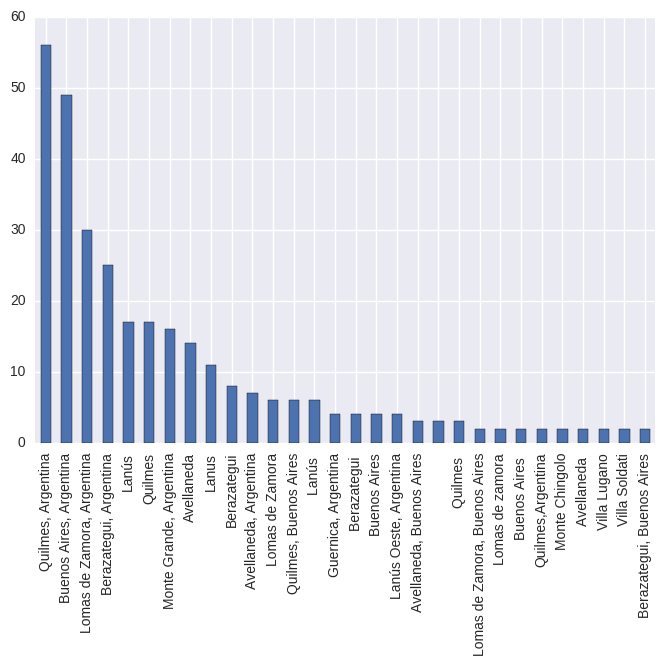

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns 

df = DataFrame.from_dict(ids,orient='index')
df.describe()
ge = df[ df['geo_enabled'] == 0].shape[0]
#print ge

print df['created_at'].max()
print df['created_at'].min()
ax = df['location'].value_counts()
df.location.value_counts()[:30].plot(kind='bar')


df.location.value_counts()[:30]
print df[df['location'] == '']
print ids[830176009]['followers'] 
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['created_at'])
df.index = df['date']
#df['2014-05']
#df.groupby(level=0).count()
#df.resample('A', how='mean')
#df.resample('A', how='sum').plot()
#df['date'].hist()
df['created_at'].groupby(df.date.dt.year).count().plot(kind="bar")
plt.xlabel(u" Año ")
plt.title(u"Usuarios por año")
#plt.show()
print df.columns
plt.savefig('histbsas.png')

In [ ]:
pd.set_option('display.max_rows', None)
df['date'] = pd.to_datetime(df['created_at'])
#print df.columns
df.index = df['created_at']
df['created_at'].groupby([df.date.dt.year,df.date.dt.month,df.date.dt.day ]).count().cumsum().plot()

plt.show()

In [4]:
pd.set_option('display.max_rows', None)
df['date'] = pd.to_datetime(df['created_at'])
dmin = df['date'].min()
dmax = df['date'].max()
from datetime import timedelta

cant = df.shape[0]
mitad = cant/2
mintemp = dmin
maxtemp = dmax
in_range_df = df[(df['date'] > dmin) & (df['date'] <= dmax)]
while in_range_df.shape[0] != mitad:
    delta = (maxtemp - mintemp) /2
    delta = delta.days
    centro = mintemp + timedelta(days = delta)#(dmax + dmin) / 2
    
                                        
    in_range_df = df[(df['date'] > dmin) & (df['date'] <= centro)]
    print centro, in_range_df.shape[0]
    if in_range_df.shape[0] < mitad:
            delta = (maxtemp - mintemp) /2
            print delta.days
            mintemp = centro 
            centro = centro + timedelta(days = delta.days)
    elif in_range_df.shape[0] > mitad:
            delta = (maxtemp - mintemp) /2
            print delta.days
            maxtemp = centro 
            centro = centro + timedelta(days = delta.days)

2013-02-24 00:48:47 197
1394
2015-01-22 00:48:47 348
697
2014-02-07 00:48:47 295
348
2013-08-17 00:48:47 248
174
2013-05-22 00:48:47 220
87
2013-07-04 00:48:47 231
43
2013-06-12 00:48:47 224
21
2013-06-23 00:48:47 229


In [27]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from apps import *

prov = 'chubut'
#for prov in argentina:
i = 0
ids = {}
file_path = 'tweetsFinal/impares/' + prov + '_tweets.json'
with open(file_path) as f:
    for line in f:
        tweet = json.loads(line)
        tid = tweet['user']['id']
        if tid not in ids:
            #print i,tid
            i += 1
            ids[tid] = {}
            ids[tid]['screen_name'] = tweet['user']['screen_name']
            ids[tid]['cant_tweets'] = 1
            ids[tid]['friends'] = tweet['user']['friends_count']
            ids[tid]['followers'] = tweet['user']['followers_count']
            ids[tid]['statuses_count'] = tweet['user']['statuses_count']
            ids[tid]['favorites'] = tweet['user']['favourites_count']
            ids[tid]['geo_enabled'] = tweet['user']['geo_enabled']
            ids[tid]['created_at'] = tweet['user']['created_at']
            ids[tid]['location'] = tweet['user']['location']
        else:
            ids[tid]['cant_tweets'] +=1
print prov,len(ids)

pd.set_option('display.max_rows', 100)

df = DataFrame.from_dict(ids,orient='index')

df['date'] = pd.to_datetime(df['created_at'])
train=df.sample(frac=0.5,random_state=200)
test=df.drop(train.index)
print train.shape
print test.shape

dmin1 = train['date'].min()
dmax1 = train['date'].max()

dmin2 = test['date'].min()
dmax2 = test['date'].max()

t1 = train['cant_tweets'].sum()
t2 = test['cant_tweets'].sum()
print t1,t2
cant = train['cant_tweets'].sum()
mitad = cant/2
mintemp = dmin1
maxtemp = dmax1
delta = (maxtemp - mintemp) /2
delta = delta
centro = mintemp + timedelta(days = delta.days)#(dmax + dmin) / 2
in_range_df1 = train[(train['date'] > dmin) & (train['date'] <= centro)]
in_range_df2 = test[(test['date'] > centro) & (test['date'] <= dmax)]

while abs(in_range_df1['cant_tweets'].sum() - in_range_df2['cant_tweets'].sum()) > 100 and delta.days > 1:
    in_range_df1 = train[(train['date'] > dmin) & (train['date'] <= centro)]
    in_range_df2 = test[(test['date'] > centro) & (test['date'] <= dmax)]
    if in_range_df1['cant_tweets'].sum() < in_range_df2['cant_tweets'].sum():
            delta = (maxtemp - mintemp) /2
            print delta.days
            mintemp = centro + timedelta(days = 1)
            centro = centro + timedelta(days = delta.days)
    elif in_range_df1['cant_tweets'].sum() > in_range_df2['cant_tweets'].sum():
            delta = (maxtemp - mintemp) /2
            print delta.days
            maxtemp = centro - timedelta(days = 1)
            centro = centro - timedelta(days = delta.days)
print centro,in_range_df1['cant_tweets'].sum(), in_range_df2['cant_tweets'].sum()


chubut 546
(273, 10)
(273, 10)
185831 186669
1333
666
665
332
0
2012-05-29 23:26:13 53815 126230


In [74]:
pd.set_option('display.max_rows', 100)

df = DataFrame.from_dict(ids,orient='index')

df['date'] = pd.to_datetime(df['created_at'])
train=df.sample(frac=0.5,random_state=200)
test=df.drop(train.index)
print train.shape
print test.shape

dmin1 = train['date'].min()
dmax1 = train['date'].max()

dmin2 = test['date'].min()
dmax2 = test['date'].max()

t1 = train['cant_tweets'].sum()
t2 = test['cant_tweets'].sum()
print dmin1,dmax1,dmin2,dmax2
print t1,t2
cant = train['cant_tweets'].sum()
mitad = cant/2
mintemp = dmin1
maxtemp = dmax1
delta = (maxtemp - mintemp) /2
delta = delta
centro = mintemp
in_range_df1 = train[(train['date'] > dmin) & (train['date'] <= centro)]
in_range_df2 = test[(test['date'] > centro) & (test['date'] <= dmax)]

while abs(in_range_df1['cant_tweets'].sum() - in_range_df2['cant_tweets'].sum()) > 1000 and delta.days > 1:
    in_range_df1 = train[(train['date'] > dmin) & (train['date'] <= centro)]
    in_range_df2 = test[(test['date'] > centro) & (test['date'] <= dmax)]
    
    if in_range_df1['cant_tweets'].sum() < in_range_df2['cant_tweets'].sum():
            delta = (maxtemp - mintemp) /2
            print delta.days,'mas'
            mintemp = centro + timedelta(days = 1)
            centro = centro + timedelta(days = delta.days)
           
    elif in_range_df1['cant_tweets'].sum() > in_range_df2['cant_tweets'].sum():
            delta = (maxtemp - mintemp) /2
            print delta.days,'menos'
            maxtemp = centro - timedelta(days = 1)
            centro = centro - timedelta(days = delta.days)
    print mintemp,maxtemp, in_range_df1['cant_tweets'].sum(), in_range_df2['cant_tweets'].sum(),delta.days    
in_range_df1 = train[(train['date'] > dmin) & (train['date'] <= centro)]
in_range_df2 = test[(test['date'] > centro) & (test['date'] <= dmax)]
print centro,in_range_df1['cant_tweets'].sum(), in_range_df2['cant_tweets'].sum()


(273, 10)
(273, 10)
2009-08-30 23:26:13 2016-12-19 17:58:30 2009-02-22 22:08:09 2016-12-18 11:35:07
185831 186669
1333 mas
2009-08-31 23:26:13 2016-12-19 17:58:30 1160 185362 1333
1333 mas
2013-04-25 23:26:13 2016-12-19 17:58:30 85006 85774 1333
2016-12-17 23:26:13 185817 105


In [77]:
df3 = df.sort_values['date']

TypeError: 'instancemethod' object has no attribute '__getitem__'

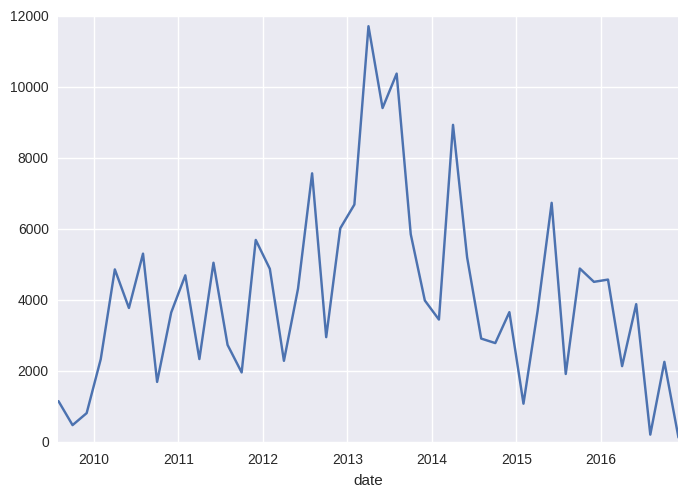

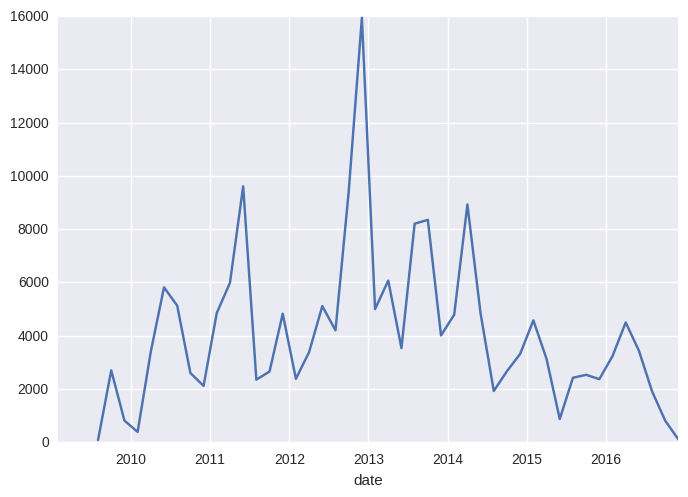

In [69]:
df.set_index('date', drop=False, inplace=True)
train=df.sample(frac=0.5,random_state=200)
test=df.drop(train.index)

# Getting the histogram
train['cant_tweets'].groupby(pd.TimeGrouper(freq='2MS')).sum().plot()

plt.show()
test['cant_tweets'].groupby(pd.TimeGrouper(freq='2MS')).sum().plot()

plt.show()


Axes(0.125,0.125;0.775x0.775)


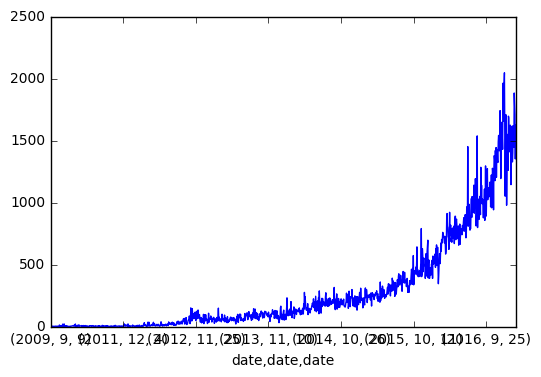

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import csv

pd.set_option('display.max_rows', 100)
df = pd.read_csv('csv_jujuy.csv',delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
df['date'] = pd.to_datetime(df['tweet_created_at'])
# agarrar todos los usuarios y dividirlos en dos
# despues separar dos dataframes con cada usuario en un unico dataframe
# hacer la busqueda binaria para encontrar la fecha en la que hay aproximadamente la misma cantidad
# de tweets en los dos dataset
print df['tweet_created_at'].groupby([df.date.dt.year,df.date.dt.month,df.date.dt.day]).count().plot()
plt.show()


In [30]:
from datetime import timedelta
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])
users = df['user_id'].drop_duplicates()
print users.shape
users1 = users.sample(frac=0.5)
users2=users.drop(users1.index)
print users1.shape, users2.shape
train = df[df['user_id'].isin(users1)]
test = df[df['user_id'].isin(users2)]
print train.shape[0],test.shape[0], train.shape[0]+test.shape[0],df.shape[0]



(526,)
(263,) (263,)
188500 172226 360726 360726


In [94]:

dmin1 = train['tweet_created_at'].min()
dmax1 = train['tweet_created_at'].max()

dmin2 = test['tweet_created_at'].min()
dmax2 = test['tweet_created_at'].max()

t1 = train.shape[0]
t2 = test.shape[0]
print dmin1,dmax1,dmin2,dmax2
print t1,t2
cant = train.shape[0]
mitad = cant/2
mintemp = min(dmin1,dmin2)
maxtemp = max(dmax1,dmax2)
dmin = mintemp
dmax = maxtemp
delta = (maxtemp - mintemp) /2
print delta.days
centro = mintemp+timedelta(delta.days)
print centro
in_range_df1 = train[(train['tweet_created_at'] > dmin) & (train['tweet_created_at'] <= centro)]
in_range_df2 = test[(test['tweet_created_at'] > centro) & (test['tweet_created_at'] <= dmax)]

while abs(in_range_df1.shape[0] - in_range_df2.shape[0]) > 10 and delta.days > 1:
    in_range_df1 = train[(train['tweet_created_at'] > dmin) & (train['tweet_created_at'] <= centro)]
    in_range_df2 = test[(test['tweet_created_at'] > centro) & (test['tweet_created_at'] <= dmax)]

    if in_range_df1.shape[0] < in_range_df2.shape[0]:
            mintemp = centro + timedelta(days = 1)
            delta = (maxtemp - mintemp) /2
            print delta.days,'mas'
            centro = centro + timedelta(days = delta.days)
           
    elif in_range_df1.shape[0] > in_range_df2.shape[0]:
            maxtemp = centro - timedelta(days = 1)
            delta = (maxtemp - mintemp) /2
            print delta.days,'menos'
            centro = centro - timedelta(days = delta.days)
    print centro, in_range_df1.shape[0], in_range_df2.shape[0],delta.days    

print centro,in_range_df1.shape[0], in_range_df2.shape[0]


2010-05-31 17:22:17 2017-02-13 23:58:08 2009-09-09 00:14:16 2017-02-13 23:59:12
188500 172226
1357
2013-05-28 00:14:16
678 mas
2015-04-06 00:14:16 5638 166437 678
339 mas
2016-03-10 00:14:16 37754 141564 339
169 mas
2016-08-26 00:14:16 80796 104804 169
83 menos
2016-06-04 00:14:16 118937 61837 83
42 menos
2016-04-23 00:14:16 98757 85490 42
20 mas
2016-05-13 00:14:16 89757 95019 20
9 menos
2016-05-04 00:14:16 93961 90482 9
3 mas
2016-05-07 00:14:16 92095 92508 3
0 menos
2016-05-07 00:14:16 92916 91667 0
2016-05-07 00:14:16 92916 91667


2010-05-31 17:22:17 2017-02-13 23:58:08 2009-09-09 00:14:16 2017-02-13 23:59:12
188500 172226


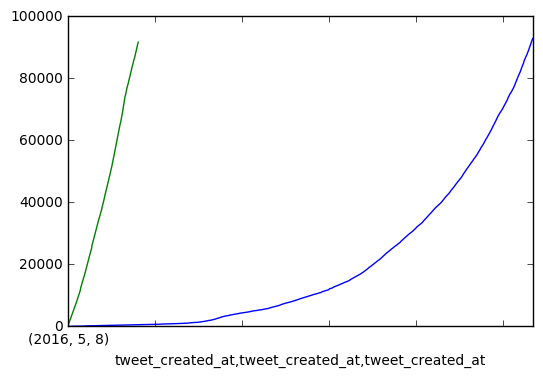

          tweet_created_at            tweet_id     user_id      screen_name  \
10     2016-04-04 04:09:53  716840188887056384  1182881023      ElissLlampa   
11     2016-04-03 01:49:53  716442565449482242  1182881023      ElissLlampa   
12     2016-04-03 01:47:13  716441893958258689  1182881023      ElissLlampa   
13     2016-04-03 01:45:45  716441527187337217  1182881023      ElissLlampa   
14     2016-01-20 04:59:23  689673553776644096  1182881023      ElissLlampa   
15     2016-01-20 04:56:17  689672774911160321  1182881023      ElissLlampa   
16     2015-12-20 13:10:33  678563138095161344  1182881023      ElissLlampa   
17     2015-12-20 05:54:05  678453295418105857  1182881023      ElissLlampa   
18     2015-12-13 03:49:49  675885308790054912  1182881023      ElissLlampa   
19     2015-12-13 03:46:40  675884514544066560  1182881023      ElissLlampa   
20     2015-11-27 03:55:35  670088555381792768  1182881023      ElissLlampa   
21     2015-11-20 01:59:46  667522691004506112  1182

In [74]:
dmin1 = train['tweet_created_at'].min()
dmax1 = train['tweet_created_at'].max()

dmin2 = test['tweet_created_at'].min()
dmax2 = test['tweet_created_at'].max()

t1 = train.shape[0]
t2 = test.shape[0]
print dmin1,dmax1,dmin2,dmax2
print t1,t2
cant = train.shape[0]
mitad = cant/2
mintemp = min(dmin1,dmin2)
maxtemp = max(dmax1,dmax2)
dmin = mintemp
dmax = maxtemp
delta = (maxtemp - mintemp) /2
centro = mintemp+timedelta(delta.days)
centro = '2016-05-08 00:14:16'
in_range_df1 = train[(train['tweet_created_at'] > dmin) & (train['tweet_created_at'] <= centro)]
in_range_df2 = test[(test['tweet_created_at'] > centro) & (test['tweet_created_at'] <= dmax)]
#train['tweet_created_at'].groupby([in_range_df1.tweet_created_at.dt.year,in_range_df1.tweet_created_at.dt.month]).count().cumsum().plot()
#test['tweet_created_at'].groupby([in_range_df2.tweet_created_at.dt.year,in_range_df2.tweet_created_at.dt.month]).count().cumsum().plot()
in_range_df1['tweet_created_at'].groupby([in_range_df1.tweet_created_at.dt.year,in_range_df1.tweet_created_at.dt.month,in_range_df1.tweet_created_at.dt.day]).count().cumsum().plot()
in_range_df2['tweet_created_at'].groupby([in_range_df2.tweet_created_at.dt.year,in_range_df2.tweet_created_at.dt.month,in_range_df2.tweet_created_at.dt.day]).count().cumsum().plot()
#train['tweet_created_at'].groupby([train.tweet_created_at.dt.year,train.tweet_created_at.dt.month]).count().cumsum().plot()
#test['tweet_created_at'].groupby([test.tweet_created_at.dt.year,test.tweet_created_at.dt.month]).count().cumsum().plot()


plt.show()
print in_range_df1

In [ ]:
import seaborn
# in_range_df1.set_index('created_at')
# in_range_df2.set_index('created_at')

# fig = plt.figure(0)
# in_range_df1['created_at'].hist()
# fig = plt.figure(0)
# in_range_df2['created_at'].hist()

# df.location.value_counts()

df.tweet_created_at.value_counts().plot(kind='bar')

fig = plt.figure(1)
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])
df.set_index('tweet_created_at')
df['tweet_created_at'].hist()


in_range_df1.set_index('tweet_created_at')
in_range_df2.set_index('tweet_created_at')

fig = plt.figure(2)
in_range_df1['tweet_created_at'].hist()
fig = plt.figure(2)
in_range_df2['tweet_created_at'].hist(color='green',stacked=True)
# in_range_df1['created_at'].groupby([in_range_df2.tweet_created_at.dt.year,in_range_df2.tweet_created_at.dt.month,in_range_df2.tweet_created_at.dt.day]).val plot()
# in_range_df2['created_at'].groupby([in_range_df2.tweet_created_at.dt.year,in_range_df2.tweet_created_at.dt.month,in_range_df2.tweet_created_at.dt.day]).plot()
plt.show()

In [ ]:
import tweepy
import calendar
file_path = 'ult_json/' + 'jujuy' + '_users.json'
api = autenticar_app(0)
i= 0 
num = 3
with open(file_path) as f:
    for line in f:
       
        
    print elid
    for t in tweepy.Cursor(api.user_timeline, id=elid,count = 200, include_rts = False ).items():
        my_date =  t.created_at
        
        print my_date,my_date.weekday(),calendar.day_name[my_date.weekday()]

In [ ]:
print t.created_at.weekday()

In [ ]:
import tweepy
import calendar
file_path = 'ult_json/' + 'jujuy' + '_users.json'
api = autenticar_app(0)
i= 0 
num = 10
with open(file_path) as f:
    for line in f:
        if i < num:
            i+=1
            elid = json.loads(line)['id']
            print elid
        else:
            break
        

In [ ]:
import json
file_path = 'ult_json/' + 'mendoza' + '_users.json'
with open(file_path) as f:
    for line in f:
        user = json.loads(line)
        print user['location']